In [34]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

In [35]:
mnist = tf.keras.datasets.mnist

In [36]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [37]:
x_train = x_train/255

In [38]:
x_test = x_test/255

In [39]:
# We have rescaled the data for easier computations
x_train.shape

(60000, 28, 28)

In [40]:
# As we can see that input shape is 28,28 for a specific mnist data image and there are 60000 training examples

In [41]:
# Lets build a ANN model to tryout the classification model
model_1 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape =(28,28)),
                                     tf.keras.layers.Dense(units = 128, activation = 'relu'),
                                     tf.keras.layers.Dropout(0.2),
                                     tf.keras.layers.Dense(units = 10, activation = 'sigmoid')])

In [42]:
model_1.compile(optimizer = 'Adam',loss = 'sparse_categorical_crossentropy',metrics = 'accuracy')

In [43]:
r = model_1.fit(x_train,y_train,validation_data = (x_test,y_test),epochs = 15)

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3004 - accuracy: 0.9127 - val_loss: 0.1324 - val_accuracy: 0.9595
Epoch 2/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1456 - accuracy: 0.9565 - val_loss: 0.1020 - val_accuracy: 0.9689
Epoch 3/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1076 - accuracy: 0.9672 - val_loss: 0.0877 - val_accuracy: 0.9731
Epoch 4/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0890 - accuracy: 0.9726 - val_loss: 0.0824 - val_accuracy: 0.9734
Epoch 5/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0757 - accuracy: 0.9761 - val_loss: 0.0731 - val_accuracy: 0.9772
Epoch 6/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0650 - accuracy: 0.9790 - val_loss: 0.0741 - val_accuracy: 0.9778
Epoch 7/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0589 - accuracy: 0.9809 - val_loss: 0.0724 - val_accuracy:

In [50]:
# We have fit our model and tested the validation accuracy as well
# Let us plot the confusion matrix for this model
y_pred = model_1.predict(x_test).argmax(axis = 1)
cm  = confusion_matrix(y_pred,y_test)

313/313 [==============================] - 0s 629us/step


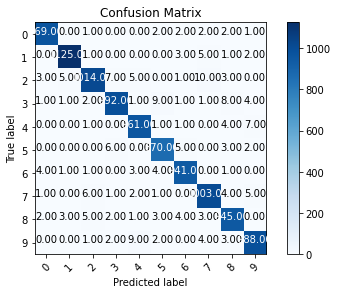

In [51]:
import itertools
labels = [0,1,2,3,4,5,6,7,8,9]
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

# Normalize the confusion matrix


# Use white text if squares are dark; otherwise black
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    color = "white" if cm[i, j] > thresh else "black"
    plt.text(j, i, format(cm[i, j], '.2f'), horizontalalignment="center", color=color)

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

The predicted label was 5 where as the real was 8


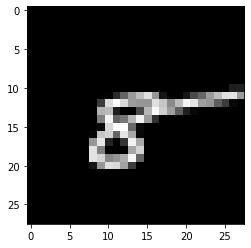

In [154]:
# As with this confusion matrix we can see that classification for similar looking classes like 2,7 the misclassification number is high
# Let us look this in-depth
misclass = np.where(y_test != y_pred)[0]
i = np.random.choice(misclass)
plt.imshow(x_test[i],cmap = 'gray')
print("The predicted label was "+str(y_pred[i])+' where as the real was '+str(y_test[i]))    

In [63]:
# By re-running you can for yourself what is the problem.

In [88]:
# Let us now try using a model with some more layers
model_2 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape =(28,28)),
                                     tf.keras.layers.Dense(units = 16, activation = 'relu'),
                                     tf.keras.layers.Dense(units = 32, activation = 'relu'),
                                     tf.keras.layers.Dense(units = 64, activation = 'relu'),
                                     tf.keras.layers.Dense(units = 128, activation = 'relu'),
                                     tf.keras.layers.Dense(units = 256, activation = 'relu'),
                                     tf.keras.layers.Dense(units = 512, activation = 'relu'),
                                     tf.keras.layers.Dropout(0.2),
                                     tf.keras.layers.Dense(units = 10, activation = 'sigmoid')])

In [89]:
model_2.compile(optimizer = 'Adam',loss = 'sparse_categorical_crossentropy',metrics = 'accuracy')

In [90]:
r_2 = model_2.fit(x_train,y_train,validation_data = (x_test,y_test),epochs = 30)

Epoch 1/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3866 - accuracy: 0.8780 - val_loss: 0.2297 - val_accuracy: 0.9298
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2071 - accuracy: 0.9381 - val_loss: 0.2173 - val_accuracy: 0.9373
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1709 - accuracy: 0.9493 - val_loss: 0.1787 - val_accuracy: 0.9517
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1486 - accuracy: 0.9552 - val_loss: 0.1719 - val_accuracy: 0.9531
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1343 - accuracy: 0.9603 - val_loss: 0.2102 - val_accuracy: 0.9456
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1235 - accuracy: 0.9622 - val_loss: 0.1347 - val_accuracy: 0.9616
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1137 - accuracy: 0.9657 - val_loss: 0.1747 - val_accuracy:

In [91]:
model_1.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0933 - accuracy: 0.9808


[0.09328067302703857, 0.9807999730110168]

In [92]:
model_2.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1872 - accuracy: 0.9630


[0.18715877830982208, 0.9629999995231628]

In [138]:
# So even after increasing the number of epochs and trying more layers our accuracy for validation set is worse and hence using this was not a great idea
# Lets go for a CNN method 
model_3 = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,(3,3),input_shape = (28,28,1),activation ='relu'),
                                     tf.keras.layers.AveragePooling2D((2,2)),
                                      tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                   tf.keras.layers.AveragePooling2D((2,2)),
#                                      tf.keras.layers.Conv2D(64,(3,3),padding = 'valid',activation = 'relu'),
#                                      tf.keras.layers.AveragePooling2D((2,2)),
#                                      tf.keras.layers.Conv2D(128,(3,3),padding = 'valid',activation = 'relu'),
#                                      tf.keras.layers.AveragePooling2D((2,2)),
                                     tf.keras.layers.Flatten(),
                                     tf.keras.layers.Dense(256,activation = 'relu'),
                                     tf.keras.layers.Dense(10,activation = 'softmax')])

In [139]:
model_3.compile(optimizer = 'Adam',loss = 'sparse_categorical_crossentropy',metrics = 'accuracy')

In [140]:
model_3.fit(x_train,y_train,validation_data = (x_test,y_test),epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1458 - accuracy: 0.9567 - val_loss: 0.0497 - val_accuracy: 0.9837
Epoch 2/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0471 - accuracy: 0.9857 - val_loss: 0.0355 - val_accuracy: 0.9883
Epoch 3/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0331 - accuracy: 0.9895 - val_loss: 0.0508 - val_accuracy: 0.9841
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0258 - accuracy: 0.9916 - val_loss: 0.0310 - val_accuracy: 0.9894
Epoch 5/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0191 - accuracy: 0.9938 - val_loss: 0.0261 - val_accuracy: 0.9912
Epoch 6/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0150 - accuracy: 0.9952 - val_loss: 0.0310 - val_accuracy: 0.9911
Epoch 7/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0117 - accuracy: 0.9960 - val_loss: 0.0228 -

In [141]:
y_pred_3 = model_3.predict(x_test).argmax(axis = 1)

313/313 [==============================] - 1s 3ms/step


In [142]:
model_3.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0404 - accuracy: 0.9891


[0.04035135358572006, 0.9890999794006348]

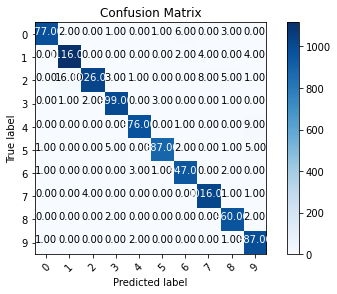

In [143]:
# The validation accuracy for model_3 or CNN is better than the previous best model by some good margin so let us plot its confusion matrix 
cm  = confusion_matrix(y_pred_3,y_test)
labels = [0,1,2,3,4,5,6,7,8,9]
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

# Use white text if squares are dark; otherwise black
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    color = "white" if cm[i, j] > thresh else "black"
    plt.text(j, i, format(cm[i, j], '.2f'), horizontalalignment="center", color=color)

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

The predicted label was 3 where as the real was 8


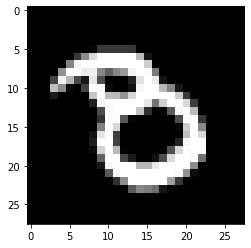

In [194]:
# There is still some confusion between some numbers but let us see what was the test input 
misclass = np.where(y_test != y_pred_3)[0]
i = np.random.choice(misclass)
plt.imshow(x_test[i],cmap = 'gray')
print("The predicted label was "+str(y_pred[i])+' where as the real was '+str(y_test[i]))   

In [192]:
# You can see the problem of misclassification with the ANN has persisted but has reduced by some margin with this model.
# Also you can see that misclassified data is more blurrier and confusing even to us humans.
# You can see that our CNN has overfitted so let us try regularizing by a dropout layer.
# We do not need to do batch normalization as our data is not that huge where it would help significantly hence we skip it here
model_4 = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,(3,3),input_shape = (28,28,1),activation ='relu'),
                                     tf.keras.layers.AveragePooling2D((2,2)),
                                     tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                     tf.keras.layers.AveragePooling2D((2,2)),
                                     tf.keras.layers.Flatten(),
                                     tf.keras.layers.Dense(256,activation = 'relu'),
                                     tf.keras.layers.Dropout(0.2),
                                     tf.keras.layers.Dense(10,activation = 'softmax')])

In [129]:
model_4.compile(optimizer = 'Adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [130]:
model_4.fit(x_train,y_train,validation_data = (x_test,y_test),epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1550 - accuracy: 0.9533 - val_loss: 0.0480 - val_accuracy: 0.9854
Epoch 2/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0538 - accuracy: 0.9834 - val_loss: 0.0437 - val_accuracy: 0.9854
Epoch 3/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0394 - accuracy: 0.9876 - val_loss: 0.0306 - val_accuracy: 0.9899
Epoch 4/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0304 - accuracy: 0.9907 - val_loss: 0.0273 - val_accuracy: 0.9910
Epoch 5/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0243 - accuracy: 0.9926 - val_loss: 0.0360 - val_accuracy: 0.9887
Epoch 6/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0206 - accuracy: 0.9936 - val_loss: 0.0259 - val_accuracy: 0.9919
Epoch 7/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0167 - accuracy: 0.9950 - val_loss: 0.0226 -

In [131]:
model_4.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0280 - accuracy: 0.9915


[0.027956563979387283, 0.9915000200271606]

In [145]:
# As you can see this has performed even better than the previous best CNN by a significant margin 
y_pred_4 = model_4.predict(x_test).argmax(axis = 1)

313/313 [==============================] - 1s 3ms/step


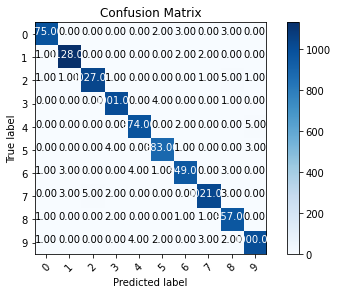

In [146]:
cm  = confusion_matrix(y_pred_4,y_test)
labels = [0,1,2,3,4,5,6,7,8,9]
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

# Use white text if squares are dark; otherwise black
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    color = "white" if cm[i, j] > thresh else "black"
    plt.text(j, i, format(cm[i, j], '.2f'), horizontalalignment="center", color=color)

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

The predicted label was 6 where as the real was 4


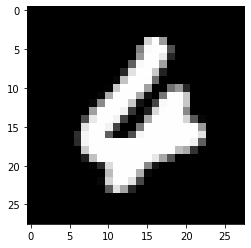

In [159]:
misclass = np.where(y_test != y_pred_4)[0]
i = np.random.choice(misclass)
plt.imshow(x_test[i],cmap = 'gray')
print("The predicted label was "+str(y_pred[i])+' where as the real was '+str(y_test[i]))   

In [166]:
# As you can see the images gets blurry that is when the output is getting fuzzier for the CNN network
# Also we can see that the humans also can mistake in classifying such images 

In [173]:
# Let us try using RNN for the same image classification problem
model_5 = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape = (28,28)),
    tf.keras.layers.SimpleRNN(units = 128,activation= 'relu'),
    tf.keras.layers.Dense(units = 10,activation = 'softmax')
])


In [174]:
model_5.compile(optimizer = 'Adam',loss = 'sparse_categorical_crossentropy',metrics = 'accuracy')

In [175]:
model_5.fit(x_train,y_train,validation_data = (x_test,y_test),epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4194 - accuracy: 0.8659 - val_loss: 0.2063 - val_accuracy: 0.9363
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1903 - accuracy: 0.9460 - val_loss: 0.1897 - val_accuracy: 0.9453
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1615 - accuracy: 0.9550 - val_loss: 0.1423 - val_accuracy: 0.9629
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1434 - accuracy: 0.9591 - val_loss: 0.1482 - val_accuracy: 0.9567
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1263 - accuracy: 0.9643 - val_loss: 0.1109 - val_accuracy: 0.9718
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1197 - accuracy: 0.9664 - val_loss: 0.1064 - val_accuracy: 0.9678
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1135 - accuracy: 0.9689 - val_loss: 0.1323 - val_accuracy:

In [176]:
model_5.evaluate(x_test,y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.0938 - accuracy: 0.9748


[0.09380391240119934, 0.9747999906539917]

In [177]:
# So this RNN has worked worse than our originial ANN which means we need to look at some more powerful RNN technique
# Let us try using LSTMS

In [179]:
model_7 = tf.keras.models.Sequential([tf.keras.layers.LSTM(128,input_shape = (28,28),activation = 'relu'),
                                     tf.keras.layers.Dense(10,activation = 'softmax')])

In [180]:
model_7.compile(optimizer = 'Adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [181]:
model_7.fit(x_train,y_train,validation_data = (x_test,y_test),epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 22s 11ms/step - loss: 0.5576 - accuracy: 0.8191 - val_loss: 0.1467 - val_accuracy: 0.9561
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1228 - accuracy: 0.9630 - val_loss: 0.0785 - val_accuracy: 0.9748
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0866 - accuracy: 0.9736 - val_loss: 0.0690 - val_accuracy: 0.9782
Epoch 4/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0681 - accuracy: 0.9799 - val_loss: 0.0620 - val_accuracy: 0.9827
Epoch 5/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0571 - accuracy: 0.9824 - val_loss: 0.0510 - val_accuracy: 0.9823
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0483 - accuracy: 0.9858 - val_loss: 0.0414 - val_accuracy: 0.9867
Epoch 7/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0403 - accuracy: 0.9875 - val_loss: 0.0455 -

In [182]:
model_7.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0405 - accuracy: 0.9889


[0.040485356003046036, 0.9889000058174133]

In [184]:
# As you can see LSTMS have worked well in comparison with RNN and other ANN 
# So finally we might conclude that the regularized CNN is the most helpful when we are classifying an mnist dataset.
# Also we can use the same analysis or code to build a fashion dataset model as well.